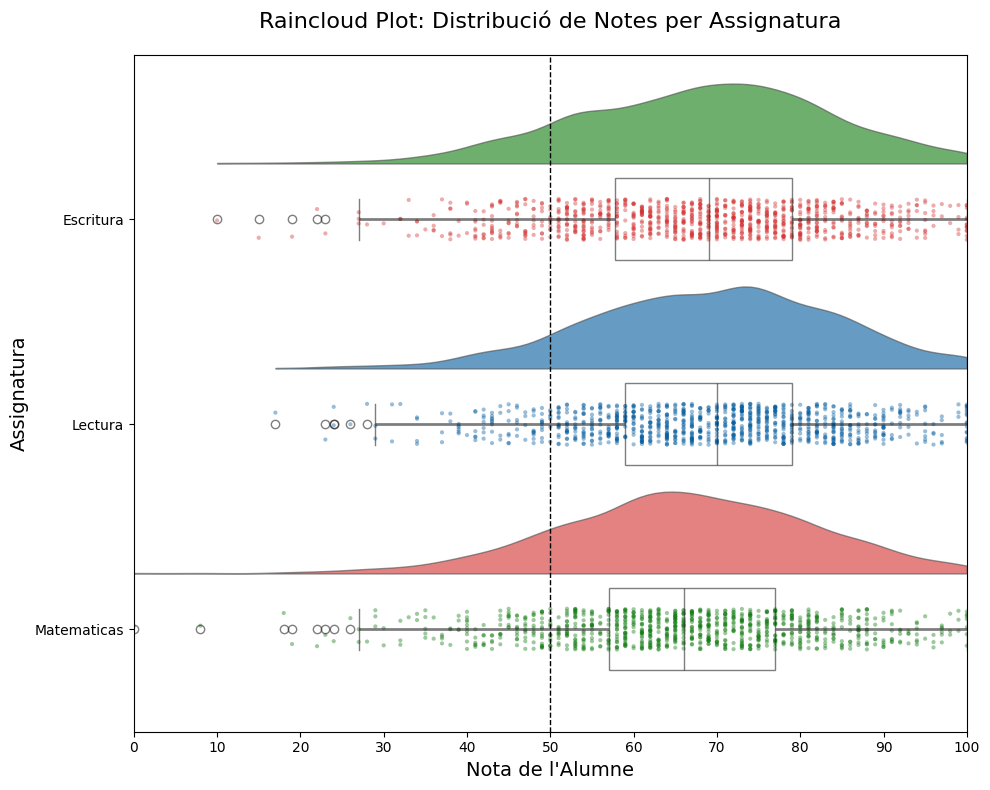


TAULA D'ESTADÍSTIQUES DESCRIPTIVES PER ASSIGNATURA
             Nota màxima  Nota mínima  Nota mediana  Q2 (25%)  Q3 (75%)
Assignatura                                                            
Escritura            100           10          69.0     57.75      79.0
Lectura              100           17          70.0     59.00      79.0
Matematicas          100            0          66.0     57.00      77.0


In [2]:
# 1. INSTAL·LACIÓ DE LLIBRERIES
!pip install ptitprince
!pip install pandas numpy matplotlib

# ====================================================================
# 2. IMPORTACIÓ I CONFIGURACIÓ
# ====================================================================

import pandas as pd
import numpy as np
import ptitprince as pt
import matplotlib.pyplot as plt

# Ignorar Advertències (per evitar missatges de FutureWarning de Pandas/Seaborn)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# ====================================================================
# 3. CÀRREGA I TRANSFORMACIÓ DE DADES
# ====================================================================

# 1. Càrrega del fitxer CSV (assumim que sempre existeix)
df = pd.read_csv('/kaggle/input/estudiantes/Estudiantes.csv')

# Columnes que contenen les notes d'interès
columnes_notes = ['Matematicas', 'Lectura', 'Escritura']

# 2. Seleccionar NOMÉS les columnes de notes
df_notes = df[columnes_notes].copy()

# 3. Transformar df_notes al format llarg ('melt')
# Ara 'melt' només processa les tres columnes de notes
df_long = df_notes.melt(var_name='Assignatura', value_name='Nota')

# 4. PAS DE NETEJA CRÍTIC:
# Intentar convertir la columna 'Nota' a numèric. Els valors de text es converteixen a NaN.
df_long['Nota'] = pd.to_numeric(df_long['Nota'], errors='coerce')

# 5. Eliminar les files on 'Nota' és NaN (neteja de dades invàlides)
df_long = df_long.dropna(subset=['Nota'])


# Definir l'ordre i la paleta de colors de forma consistent
assignatura_order = ['Escritura', 'Lectura', 'Matematicas'] 
custom_palette = ['#0E7A0E', '#005A9E', '#D32F2F'] # Verd, Blau, Vermell

# ====================================================================
# 4. CREACIÓ DEL RAINCLOUD PLOT
# ====================================================================

# Inicialitzar figura i eix
f, ax = plt.subplots(figsize=(10, 8))

# Utilitzar pt.RainCloud per generar el gràfic
ax = pt.RainCloud(
    x = 'Assignatura',
    y = 'Nota',
    data = df_long,
    orient = 'h', # Orientació horitzontal
    order = assignatura_order, 
    palette = custom_palette,
    width_viol = .8,
    width_box = .4,
    move = .0,
    alpha = 0.6,
    rain_alpha = 0.4,
    ax = ax
)

# --- Ajustos finals del gràfic ---
ax.set_title("Raincloud Plot: Distribució de Notes per Assignatura", fontsize=16, pad=20)
ax.set_xlabel("Nota de l'Alumne", fontsize=14)
ax.set_ylabel("Assignatura", fontsize=14)

# Línia vertical de referència en 50
ax.axvline(x=50, color='black', linestyle='--', linewidth=1)

plt.xlim(0, 100)
# Numeració de l'eix X cada 10 punts
ax.set_xticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

# ====================================================================
# 5. CÀLCUL I VISUALITZACIÓ D'ESTADÍSTIQUES DESCRIPTIVES 📊
# ====================================================================

print("\n" + "="*50)
print("TAULA D'ESTADÍSTIQUES DESCRIPTIVES PER ASSIGNATURA")
print("="*50)

# 1. Definir les funcions d'agregació
agg_list = [
    ('Nota màxima', 'max'),
    ('Nota mínima', 'min'),
    ('Nota mediana', 'median'), # Valor central (Q2)
    ('Q2 (25%)', lambda x: x.quantile(0.25)),
    ('Q3 (75%)', lambda x: x.quantile(0.75))
]

# 2. Calcular les estadístiques
tabla_resumen = df_long.groupby('Assignatura')['Nota'].agg(agg_list)

# 3. Formatejar la taula i mostrar-la
tabla_resumen = tabla_resumen.reindex(assignatura_order)

# CONVERTIR MÀXIMA I MÍNIMA A ENTERS (int)
tabla_resumen[['Nota màxima', 'Nota mínima']] = \
    tabla_resumen[['Nota màxima', 'Nota mínima']].astype(int)

# Q1, MEDIANA I Q3 es mantenen amb decimals

# 4. Mostrar la taula
print(tabla_resumen)
print("="*50)